### Introduction ###

A neural network is a method in the field of machine learning used to build predictive models to help solve complex tasks. The network is first exposed to a large amount of data, then the system is trained to learn the best predictions by itself.

The components of neural networks are 'neurons' or nodes, which take in any number of inputs, apply a mathematical function to them, and return outputs onward to other neurons. Each input is weighted; the weights are free parameters to be adjusted during training. The mathematical function is known as the 'activation function'.

The network consists of many layers of neurons; the outputs of one layer are inputs to the next. By stacking layers together, the basic activation functions can form more complex mathematical functions. The aim is to construct a function which maps the inputs to the desired outputs. This is done by adjusting the weights each neuron applies to its inputs.





In [ ]:
The XOR, or “exclusive or”, problem is the problem of using a neural network to predict the outputs of XOR logic gates given two binary inputs. An XOR function should return a true value if the two inputs are not equal and a false value if they are equal. All possible inputs and predicted outputs are shown in figure 1.
![image.png](attachment:image.png)

XOR is a classification problem. Expected outputs are known in advance. So we use suprvised learning. 

On the surface, XOR appears to be a simple problem. However, Minsky and Papert (1969) explained how it was a huge problem for neural network architectures at the time (perceptrons).


In [45]:
# Create input array (x) and output array (y)

x = np.array([[0, 0], 
              [0, 1],
              [1, 0],
              [1, 1]]) 

y = np.array([[0], 
             [1], 
             [1],
             [0]])

### Perceptrons ###

Perceptrons have a single layer of input units. The input units X1, X2 etc. are multiplied by their respective weights W0, W1 etc., and passed to the output unit. A bias is added. This is then passed through an activation function (typically Heavside step function), converting the resulting value to a 0 or 1. 

It is the weight variables that controls the conversion of input to output. And biases. 

Single-layer perceptrons are only capable of separating data points with a single line. XOR inputs are not linearly separable. There is no way to separate the 1 and 0 predictions with a single line. 


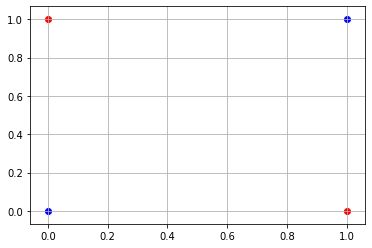

In [46]:
# Visualise classfication problem - note nonlinearity 

plt.grid()

for i in range(len(x)):
    c = 'r'
    if y[i] == 0:
        c = 'b'
    plt.scatter([x[i][0]], [x[i][1]], c=c)


### Multilayer Perceptrons ###

The solution is to expand beyond the single-layer architecture by adding another layer of units, known as the 'hidden layer'. This is known as a multilayer perceptron (MLP). 

An MLP can have any number of units in its input, hidden and output layers, and any number of hidden layers.

Here, forward propagation: input values multiplied with respective weights, bias added, passed through activation function (typically sigmoid function). The outputs of each hidden layer unit are then multiplied by another set of weights and parsed to an output unit. After being passed through another activation function, the network outputs its prediction (values between 0 and 1). 

This architecture is capable of achieving nonlinear separation. Thus, it can correctly classify XOR inputs. 

The Universal Approximation Theorem states that a 2-layer network can approximate any function, given a complex enough architecture.

### Backpropagation ###

How do we know the correct weight values?

Trying to find out manually would be incredibly laborious (and is NP-complete). Can learn automatically a good approximation through backpropagation. First demonstrated for XOR problem by Rumelhart et al. (1985).

First - compare predicted value output by forward propagation to the actual value (y). Get 'error'. Adjust the weights in a direction that reduces the size of the error. Both forward and backpropagation are run thousands of times on each input combination until the weights are well-adjusted.

BP is a way to 'intelligently train' the network. 

**Loss function** - a way to quantify the performance of the network. The difference between the network's predictions and actual outputs. E.g. mean-squared error, cross-entropy loss. 

Training becomes an optimisation problem of minimising the loss function. Although advanced techniques exist - e.g. simulated annealing, genetic algorithms - to find global minima of black-box functions, the huge number of free parameters in these networks means these approaches are very slow to converge. 

Though the loss function contains many local minima, each minima is about as optimal as any other. We can use the **gradient descent** algorithm to find such minima. Gradient descent calculates the slope fo the loss function at the current point in parameter space and moves in the direction in which the gradient is steepest. 

**Updating the network**

We take a data point and do a *forward pass* through the network.
We then evaluate the loss function of the output.
We do a *backward pass* thgouh the network, finding the gradient of the loss function. Backpropagation allows to analytically derive the effect of each parameter in each layer on the output of the network. We adjust each parameter by taking a small step *down* the gradient. The size of the step is referred to as the learning rate, eta.





In [47]:
# Import dependencies

import numpy as np 

In [79]:
# Define activation function and its derivative 

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def sigmoid_prime(z):
    return z*(1-z)

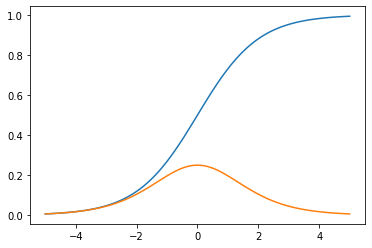

In [80]:
# Visualise the function

z = np.linspace(-5, 5, 100)
plt.plot(z, sigmoid(z))
plt.plot(z, sigmoid_prime(sigmoid(z)))

In [81]:
# Set weights, biases and hyperparameters


l = len(x)           # Get dimensions of input array 
l1 = len((x)[0])

np.random.seed(0)     # Set random seed

# Set weights
wi = np.random.random((l1, l))   # Weights from input to hidden layer
wh = np.random.random((l, 1))    # Weights from hidden to output layer

# Set biases 
bi = np.random.random((1, l))    # Biases from input to hidden layer
bh = np.random.random((1, 1))    # Biases from hidden to output layer

epochs = 100000       # Set number of epochs (training iterations)
eta = 1               # Set learning rate 


In [76]:
for i in range(epochs):
    
    # Forward pass
    
    a0 = x                                # Activation of input layer
    a1 = sigmoid(np.dot(a0, wi) + bi)     # Activation of hidden layer
    a2 = sigmoid(np.dot(a1, wh) + bh)     # Activation of output layer
    
    # Backpropagation
    
    a2_err = y - a2           # Error = actual output - predicted outut
    a2_delta = np.multiply(a2_err, sigmoid_prime(a2))
    
    a1_err = np.dot(a2_delta, wh.T)
    a1_delta = np.multiply(a1_err, sigmoid_prime(a1))
    
    # Update weights and biases
    
    wh += eta * (np.dot(a1.T, a2_delta))
    wi += eta * (np.dot(a0.T, a1_delta))
    
    bh += eta * np.sum(a2_delta, axis=0, keepdims=True)
    bi += eta * np.sum(a1_delta, axis=0, keepdims=True)
    
# Print final parameters
    
print('Final hidden weights: \n %s' % wi)
print('\n Final hidden bias: \n %s' % bi)
print('\n Final output weights: \n %s' % wh)
print('\n Final output bias: \n %s' % bh)

# Print final predictions

print('\n Output from neural network after %s epochs: \n %s' % (epochs, a2))

Final hidden weights: 
 [[7.12415454 1.53650714 5.67917875 5.22985046]
 [7.11503214 1.53195597 5.68137635 5.22446067]]

 Final hidden bias: 
 [[-3.27900243 -2.25280785 -8.61446641 -2.30582472]]

 Final output weights: 
 [[ 11.18269885]
 [ -5.11639206]
 [-13.99667467]
 [  5.83389664]]

 Final output bias: 
 [[-7.16586739]]

 Output from neural network after 100000 epochs: 
 [[0.00120472]
 [0.9990269 ]
 [0.99902687]
 [0.0010573 ]]


### Problem with sigmoidal activation function ###

The gradient converges asymptotically to zero at large absolute values of x. So if the activation of the neuron is not in the central region, the local gradient is zero. During backprop, incoming gradient gets multiplied by this local gradient, leading to 'vanishing gradients'. The neurons can thereby not update their weights, since the updates depend on the gradients. This can lead to 'dead neurons' within the network. 

The second problem is that the outputs are not zero-centred. The gradient is either always positive or always negative. If the optimum set of weights happens to be a mixture of positive and negative weights, this can only be reached by inefficient zigzag updates.

A solution is to use a rectified linear unit (ReLU). Here the gradient never saturates in the positive region, and is quick to evaluate.

### Problem with initialisation ###

Default approach to initialising weights is to sample them from Gaussian distribution. If they are too low, the output of the neurons is too small and the gradient propagated to the weights vanishes. 

In 2010, Bengio & Glorot derived a new initialisations cheme - Xavier initalisation. Sets the factor equal to one over the square root of th enumber of inputs to a neuron. So neurons with many inputs have lower weights, and vice versa. 


### Problem with convergence time ###

Gradient descent can get stuck in gently sloping valleys. The updates cause zigzag oscillations between the sides of the valley, while the optimal path would be to move along teh centre.

Add a momentum step.

More improvements  https://medium.com/series/839cfe45cac9 



### Backprop - more detail ###

Principle of backprop - to model a given function by modifying internal weightings of input signals to produce expected output signal. Trained with supervised leadning method, where error between system's output and known expected output is presented to system and used to modify internal state.

Backprop is method for training weights of multilayer feedforward neural network. Works for both regression + classification.

